In [4]:
! brew install graphviz

==> Downloading https://ghcr.io/v2/homebrew/core/graphviz/manifests/11.0.0
######################################################################### 100.0%
==> Fetching dependencies for graphviz: libpng, freetype, fontconfig, jpeg-turbo, brotli, giflib, highway, imath, xz, zstd, libtiff, little-cms2, openexr, webp, jpeg-xl, libvmaf, aom, libavif, gd, pcre2, ca-certificates, openssl@3, readline, sqlite, python@3.12, gettext, glib, jasper, netpbm, gts, xorgproto, libxdmcp, libxcb, libx11, libxext, cairo, gdk-pixbuf, fribidi, icu4c, harfbuzz, pango, librsvg and libtool
==> Downloading https://ghcr.io/v2/homebrew/core/libpng/manifests/1.6.43
######################################################################### 100.0%
==> Fetching libpng
==> Downloading https://ghcr.io/v2/homebrew/core/libpng/blobs/sha256:37936ba5cd5
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/freetype/manifests/2.13.2-1
##############

In [5]:
from typing import Any
from energy_box_control.network import Network
import graphviz

%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


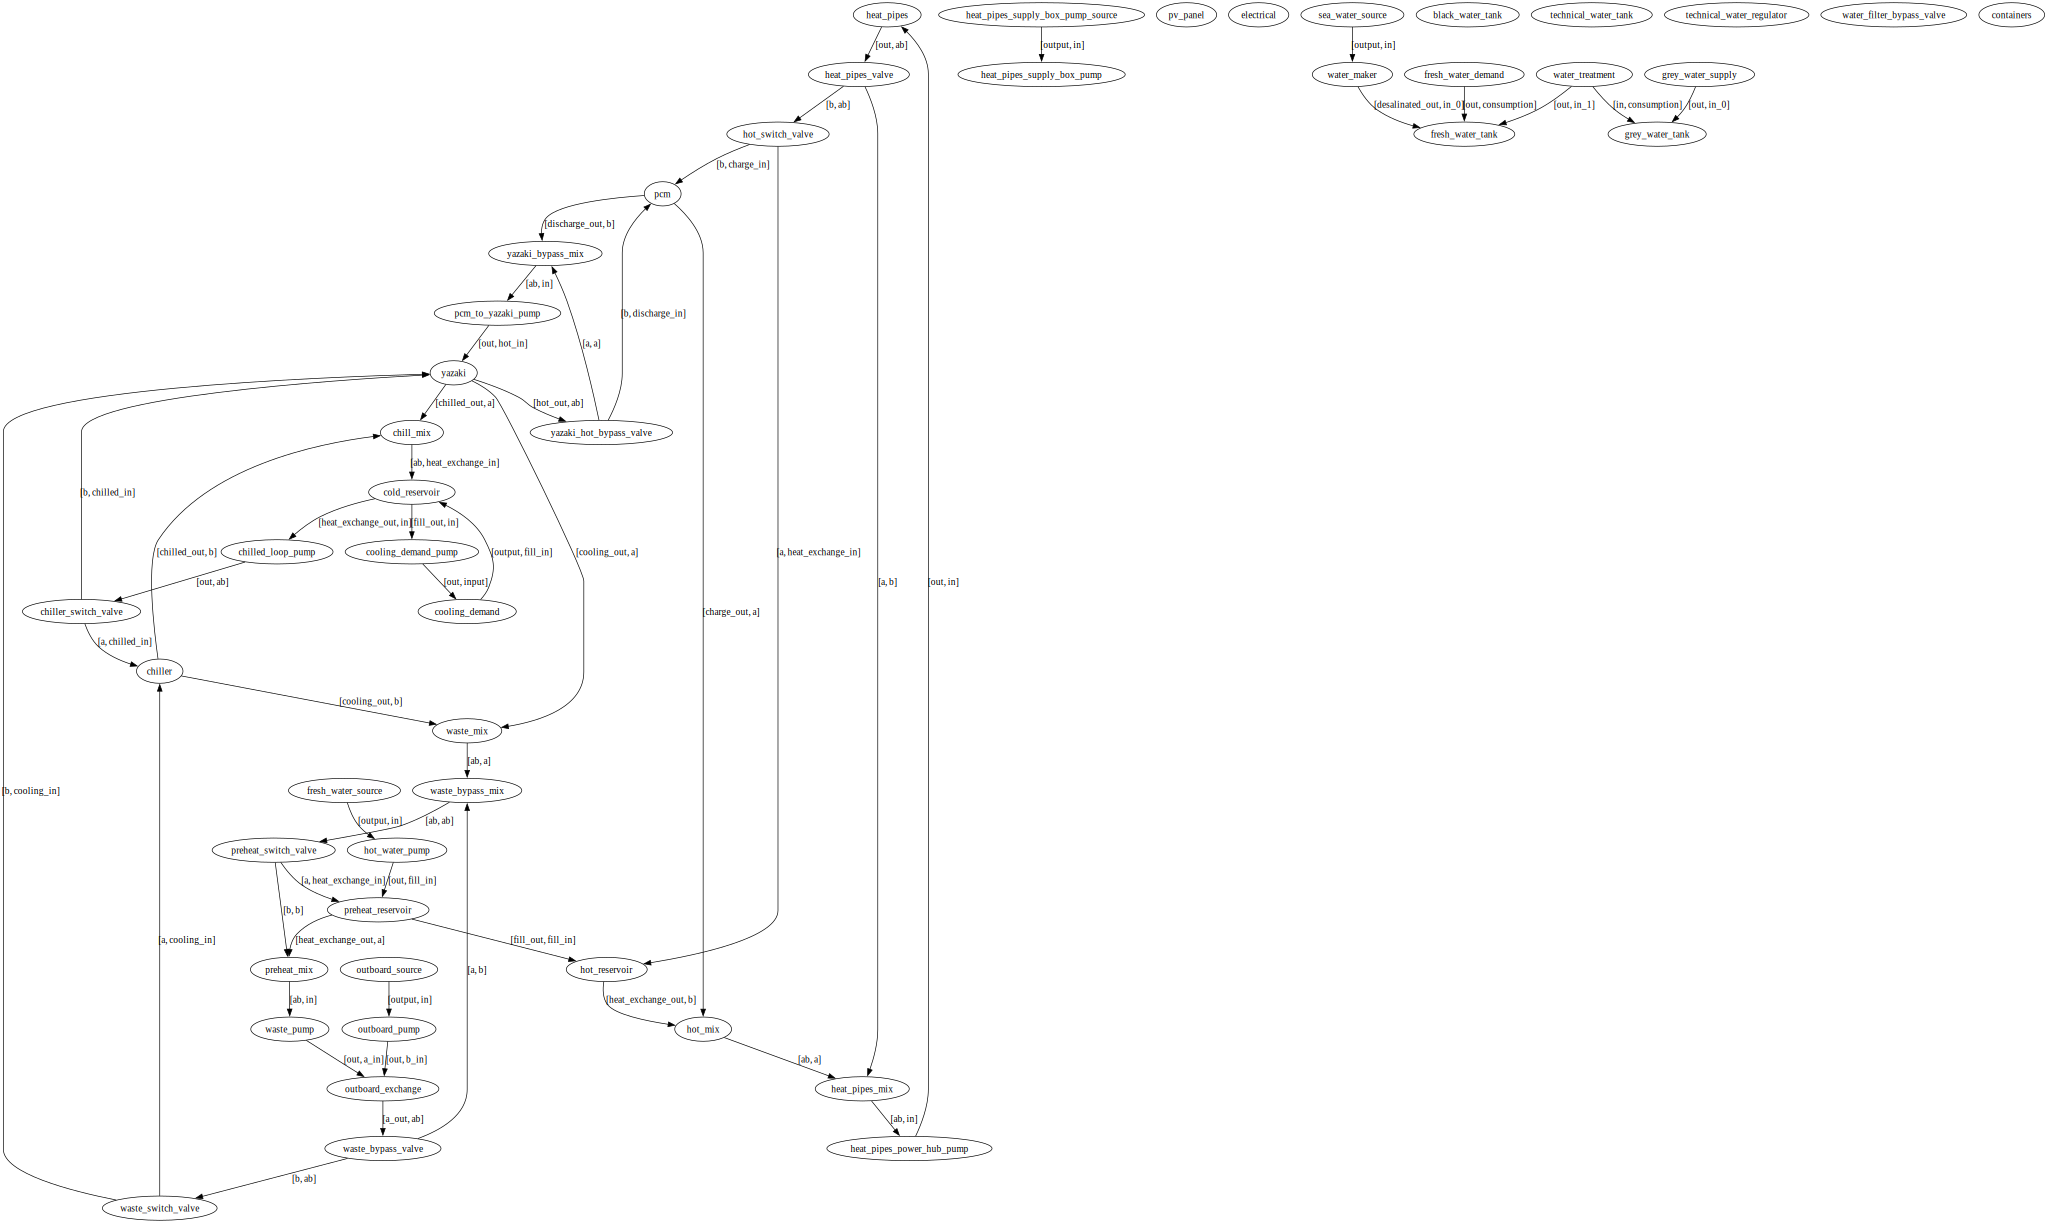

In [6]:
from dataclasses import fields

from energy_box_control.appliances.base import BaseAppliance
from energy_box_control.power_hub.network import PowerHub, PowerHubSchedules


def draw(network: Any, name: str):
    dot = graphviz.Digraph(name=name)

    for field in fields(network):
        if isinstance(getattr(network, field.name), BaseAppliance):
          dot.node(str(getattr(network, field.name).id), field.name)
    
    for connection in network.connections().connections + network.feedback().feedbacks:
      dot.edge(str(connection.from_app.id), str(connection.to_app.id), label=f"[{connection.from_port.value}, {connection.to_port.value}]")

    return dot
    
network = PowerHub.power_hub(PowerHubSchedules.const_schedules())

dot = draw(network, "PowerHub")
dot

In [ ]:
dot.render("result")

'result.pdf'